In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn import preprocessing as prep

pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 20)
pd.set_option("display.precision", 6)
pd.set_option("plotting.backend", "matplotlib")
%matplotlib inline

plt.style.use('default')


# Загрузка данных

In [2]:
df = pd.read_csv('./content/cars_moldova_hw1_cat.csv', delimiter = ',')
df.tail()

,Make,Model,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Brand_country,Age,Age_group,Wear
32913,Land Rover,Others,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0,european,21,"(18.0, 23.0]","(189001.0, 252001.0]"
32914,Dacia,Logan Mcv,Universal,89000.0,1500.0,Diesel,Manual,7000.0,european,8,"(7.0, 13.0]","(63001.0, 126001.0]"
32915,Renault,Others,Hatchback,225.0,1500.0,Diesel,Manual,4500.0,european,14,"(13.0, 18.0]","(1.0, 63001.0]"
32916,Mazda,Others,Combi,370000.0,2000.0,Diesel,Manual,4000.0,japan,17,"(13.0, 18.0]","(315000.0, 378000.0]"
32917,Renault,Grand Scenic,Minivan,300000.0,1500.0,Diesel,Manual,4000.0,european,17,"(13.0, 18.0]","(252001.0, 315000.0]"


Отделяем числовые столбцы

In [3]:
num_columns=[column_name for  column_name in  df.columns if  df[column_name].dtype == np.float64 or df[column_name].dtype == np.int64]
num_columns


['Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'Age']

Считываем данные, разбиваем на тестовую и тренировочную, нормализуем

In [4]:
df_num = df[num_columns].copy()
X,y = df_num.drop(columns = ['Price(euro)']).values,df_num['Price(euro)'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Линейная Регрессия

In [5]:
LR = LinearRegression(fit_intercept=True)

LR.fit(X_train, y_train)

B0=LR.intercept_
B=LR.coef_

line='{:.2f}'.format(B0)
sign=['+','-']

features_names = df_num.drop(columns = ['Price(euro)']).columns
for p,(fn,b) in enumerate(zip(features_names,B)):
  line=line+sign[int(0.5*(np.sign(b)-1))]+'{:.2f}*'.format(np.abs(b))+fn

print('Решение')
print(line)
print('\n')

Решение
9144.60-0.01*Distance+5.84*Engine_capacity(cm3)-634.35*Age




## Визуализация Весов

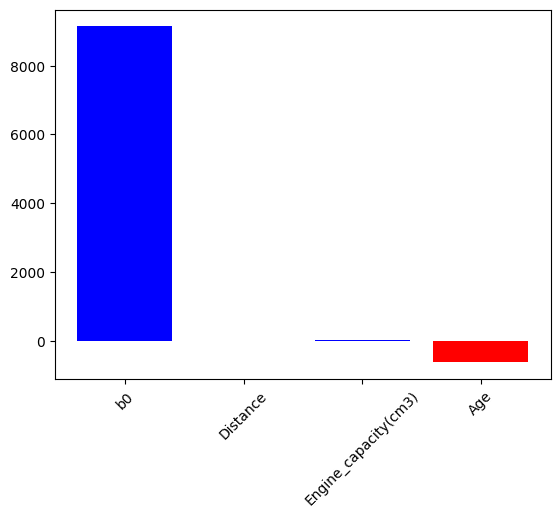

In [6]:
def weights_vis(B, B0, features_names):
    numbers = np.arange(0,len(features_names)+1)
    Bs = np.hstack([B0,B])
    tick_labels = ['B'+str(num) for num in numbers]
    cc=['']*len(numbers)
    for n,val in enumerate(Bs):
        if val<0:
            cc[n]='red'
        elif val>=0:
            cc[n]='blue'

    plt.bar(x = numbers, height = Bs, color = cc)
    plt.xticks(np.arange(0,len(features_names)+1),np.hstack(['b0', features_names]),rotation = 45 )
    plt.show()

weights_vis(B, B0, features_names)

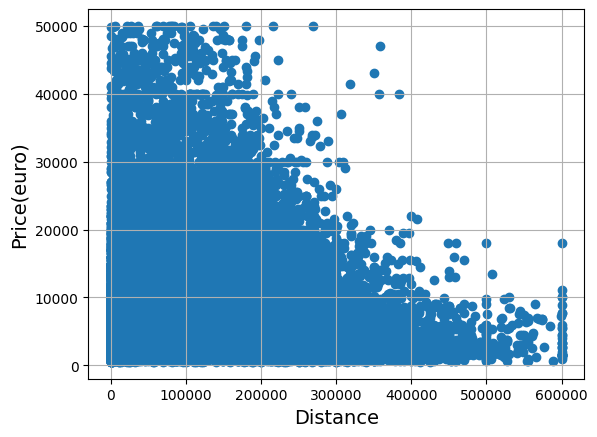

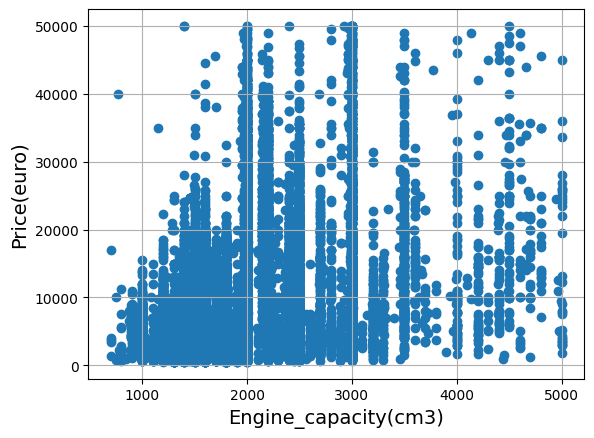

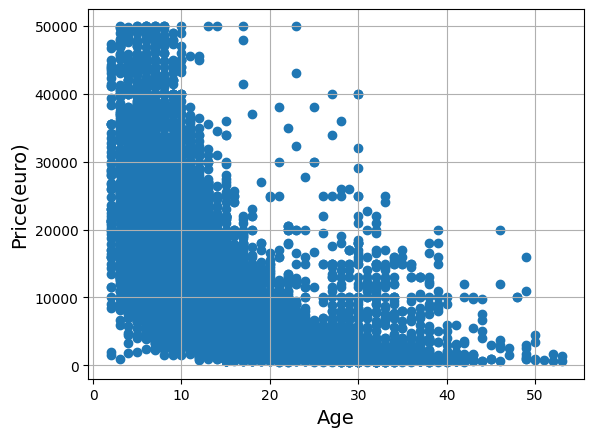

In [7]:
plt.figure()
plt.scatter(X[:,0], y)
plt.grid()
plt.xlabel(features_names[0], fontsize=14)
plt.ylabel('Price(euro)', fontsize=14)
plt.title('', fontsize=14)
plt.show()
plt.figure()
plt.scatter(X[:,1], y)
plt.grid()
plt.xlabel(features_names[1], fontsize=14)
plt.ylabel('Price(euro)', fontsize=14)
plt.title('', fontsize=14)
plt.show()
plt.figure()
plt.scatter(X[:,2], y)
plt.grid()
plt.xlabel(features_names[2], fontsize=14)
plt.ylabel('Price(euro)', fontsize=14)
plt.title('', fontsize=14)
plt.show()

Анализ показывает, что параметром расстояния можно пренебречь. Пересчитаем модель

In [8]:
drop_columns=['Distance']
X1 = df_num.drop(columns = ['Price(euro)', *drop_columns]).values

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)
features_names1 = df_num.drop(columns = ['Price(euro)', *drop_columns]).columns

Решение
+5.69*Engine_capacity(cm3)-682.28*Age




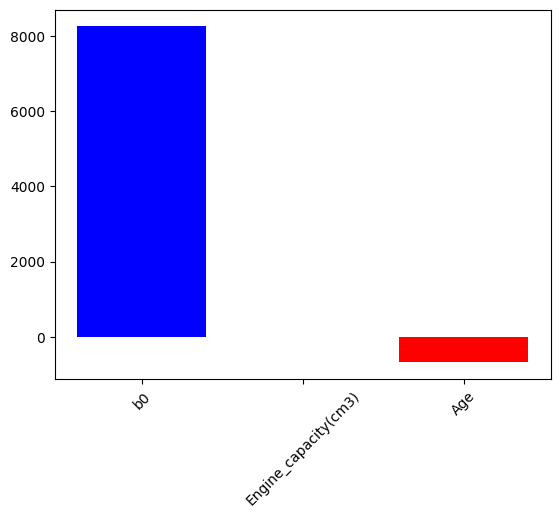

In [9]:
LR1 = LinearRegression(fit_intercept=True)

LR1.fit(X1_train, y_train)

B01=LR1.intercept_
B1=LR1.coef_

line='{:.2f}'.format(B01)
sign=['+','-']

line=''
for p,(fn,b) in enumerate(zip(features_names1,B1)):
  line=line+sign[int(0.5*(np.sign(b)-1))]+'{:.2f}*'.format(np.abs(b))+fn

print('Решение')
print(line)
print('\n')
weights_vis(B1, B01, features_names1)

## Кросс-валидация


In [10]:
scoring = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           'Max': 'max_error'}

scores = cross_validate(LR1, X1_train, y_train,
                      scoring=scoring, cv=ShuffleSplit(n_splits=5, random_state=42) )

print('Результаты Кросс-валидации')
DF_cv_linreg = pd.DataFrame(scores)
print(DF_cv_linreg)
print('\n')
print(DF_cv_linreg.mean()[2:])
print('\n')

Результаты Кросс-валидации
   fit_time  score_time   test_R2     test_-MSE    test_-MAE      test_Max
0  0.002969    0.000521  0.497229 -3.099675e+07 -3555.909262 -45376.820704
1  0.001953    0.000389  0.509322 -3.123279e+07 -3598.214795 -42665.746904
2  0.001691    0.000372  0.536851 -2.936273e+07 -3525.325520 -39947.636267
3  0.001501    0.000351  0.524461 -3.082122e+07 -3632.879524 -43622.596647
4  0.001434    0.000329  0.529719 -2.974083e+07 -3504.748056 -43637.084030


test_R2      5.195164e-01
test_-MSE   -3.043086e+07
test_-MAE   -3.563415e+03
test_Max    -4.304998e+04
dtype: float64




## Применение Метрик

In [11]:
LR1.fit(X1_train, y_train)
y_predict=LR1.predict(X1_test)

print('Ошибка на тестовых данных')
print('MSE: %.1f' % mse(y_test,y_predict))
print('RMSE: %.1f' % mse(y_test,y_predict,squared=False))
print('R2 : %.4f' %  r2_score(y_test,y_predict))
print('Абсолютный размах значений: %.1f' % (y.max()-y.min()))

Ошибка на тестовых данных
MSE: 28833338.5
RMSE: 5369.7
R2 : 0.5266
Абсолютный размах значений: 49499.0


Ошибка модели большая.


## Визуализация Тестовых и Предсказанных значений

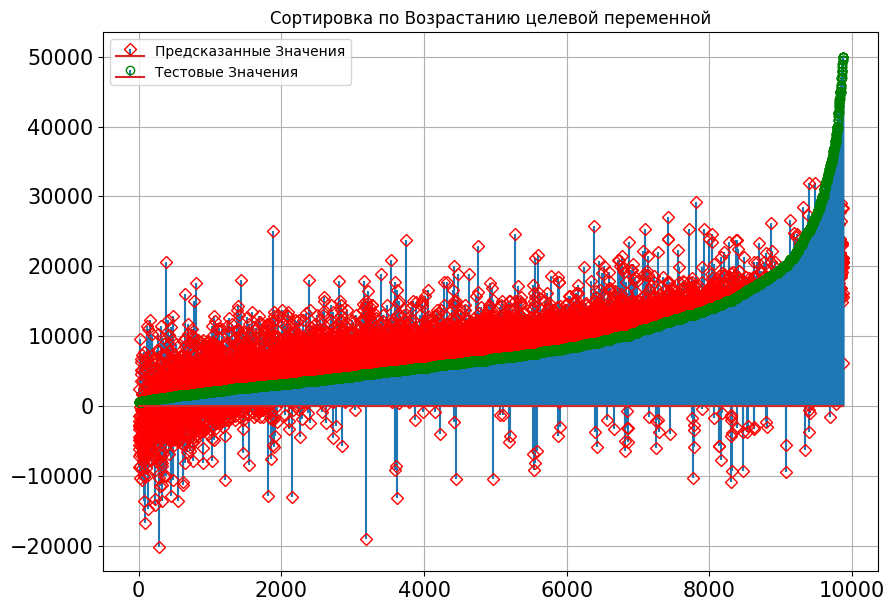

In [12]:
def print_stem(y, label, marker):
    markerline, stemlines, baseline = plt.stem(y, markerfmt=marker,label = label)
    markerline.set_markerfacecolor('none')

fig=plt.figure(figsize=(10, 7))
sorted = np.argsort(y_test)
print_stem(y_predict[sorted], 'Предсказанные Значения', 'rD')
print_stem(y_test[sorted], 'Тестовые Значения', 'go')
plt.grid()
plt.title('Сортировка по Возрастанию целевой переменной')
plt.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);
plt.show()

Точность предсказания для бюджетных моделей автомобилей выше.


# Стандартизация числовых признаков

In [13]:
df_num = df[num_columns].copy()
X,y = df_num.drop(columns = ['Price(euro)']).values,df_num['Price(euro)'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler  = MinMaxScaler()
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

## Линейная Регрессия

Решение
11961.10-6528.04*Distance+25094.86*Engine_capacity(cm3)-32351.71*Age




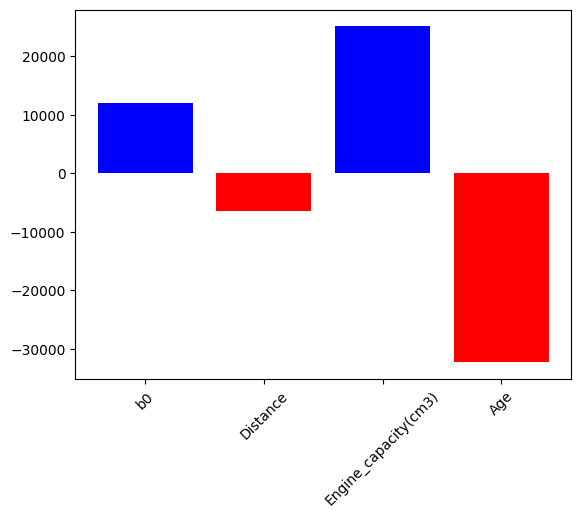

In [14]:
LR = LinearRegression(fit_intercept=True)
LR.fit(X_train, y_train)

B0=LR.intercept_
B=LR.coef_

line='{:.2f}'.format(B0)

for p,(fn,b) in enumerate(zip(features_names,B)):
  line=line+sign[int(0.5*(np.sign(b)-1))]+'{:.2f}*'.format(np.abs(b))+fn

print('Решение')
print(line)
print('\n')

weights_vis(B, B0, features_names)

## Применение Метрик

In [15]:
LR.fit(X_train, y_train)
y_predict=LR.predict(X_test)

print('Ошибка на тестовых данных')
print('MSE: %.1f' % mse(y_test,y_predict))
print('RMSE: %.1f' % mse(y_test,y_predict,squared=False))
print('R2 : %.4f' %  r2_score(y_test,y_predict))
print('Абсолютный размах значений: %.1f' % (y.max()-y.min()))

Ошибка на тестовых данных
MSE: 27865698.4
RMSE: 5278.8
R2 : 0.5425
Абсолютный размах значений: 49499.0


Вывод: вес отдельных параметров увеличился, однако общая точность модели не изменилась.

# Степенное преобразование

In [16]:
df_pt = pd.read_csv('./content/cars_moldova_hw1_df_pt.csv', delimiter = ',')
df_pt.tail()

,Distance,Engine_capacity(cm3),Price(euro),Age
32913,0.574587,0.053121,-0.454476,0.940857
32914,-0.752099,-0.684590,0.076796,-1.011362
32915,-2.219265,-0.684590,-0.429379,0.066070
32916,1.720679,0.440833,-0.560232,0.475051
32917,1.189461,-0.684590,-0.560232,0.475051


In [17]:
df_pt = df_pt[num_columns].copy()
X,y = df_pt.drop(columns = ['Price(euro)']).values,df_num['Price(euro)'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler  = MinMaxScaler()
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)


## Линейная Регрессия

Решение
9494.34-3230.68*Distance+25955.92*Engine_capacity(cm3)-32494.41*Age




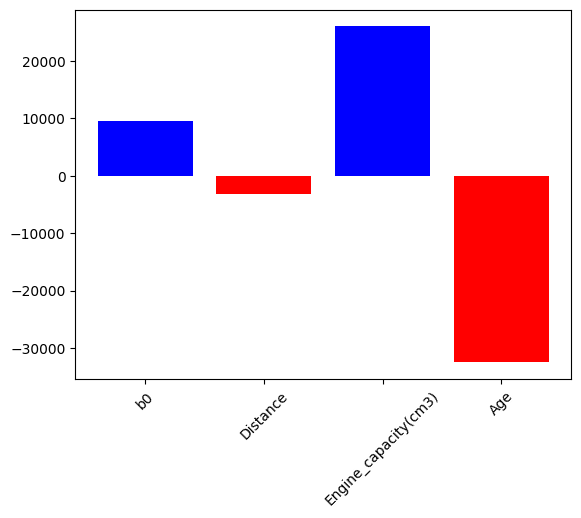

In [18]:
LR = LinearRegression(fit_intercept=True)
LR.fit(X_train, y_train)

B0=LR.intercept_
B=LR.coef_

line='{:.2f}'.format(B0)

for p,(fn,b) in enumerate(zip(features_names,B)):
  line=line+sign[int(0.5*(np.sign(b)-1))]+'{:.2f}*'.format(np.abs(b))+fn

print('Решение')
print(line)
print('\n')

weights_vis(B, B0, features_names)

## Применение Метрик

In [19]:
LR.fit(X_train, y_train)
y_predict=LR.predict(X_test)

print('Ошибка на тестовых данных')
print('MSE: %.1f' % mse(y_test,y_predict))
print('RMSE: %.1f' % mse(y_test,y_predict,squared=False))
print('R2 : %.4f' %  r2_score(y_test,y_predict))
print('Абсолютный размах значений: %.1f' % (y.max()-y.min()))

Ошибка на тестовых данных
MSE: 23417942.5
RMSE: 4839.2
R2 : 0.6155
Абсолютный размах значений: 49499.0


Вывод: степенное преобразование позволило увеличить точность модели.

# Добавление категориальных признаков

In [20]:
df_numeric_encoded = pd.read_csv('./content/cars_moldova_hw1_numeric_encoded.csv', delimiter = ',')
df_numeric_encoded.tail()

,Model,Make,Style,Brand_country,Age_group,Wear,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_Hybrid,Fuel_type_Metan/Propan,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid,Transmission_Manual
32913,26,10,3,2,3,3,0,0,0,1,0,0,1
32914,23,4,11,2,1,1,1,0,0,0,0,0,1
32915,26,20,4,2,2,0,1,0,0,0,0,0,1
32916,26,12,1,3,2,5,1,0,0,0,0,0,1
32917,19,20,6,2,2,4,1,0,0,0,0,0,1


Оставим только поля, полученные с помощью с помощью one-hot кодирования


In [21]:
transformed_fields = ['Model','Make', 'Style', 'Brand_country', 'Age_group', 'Wear']
df_numeric_encoded_1 = df_numeric_encoded.drop(columns = transformed_fields)
df_num= pd.concat([df_pt,df_numeric_encoded_1], axis = 1)
df_num.tail()

,Distance,Engine_capacity(cm3),Price(euro),Age,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_Hybrid,Fuel_type_Metan/Propan,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid,Transmission_Manual
32913,0.574587,0.053121,-0.454476,0.940857,0,0,0,1,0,0,1
32914,-0.752099,-0.684590,0.076796,-1.011362,1,0,0,0,0,0,1
32915,-2.219265,-0.684590,-0.429379,0.066070,1,0,0,0,0,0,1
32916,1.720679,0.440833,-0.560232,0.475051,1,0,0,0,0,0,1
32917,1.189461,-0.684590,-0.560232,0.475051,1,0,0,0,0,0,1


In [22]:
X = df_num.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Линейная Регрессия

In [23]:
LR = LinearRegression(fit_intercept=True)
LR.fit(X_train, y_train)

B0 = LR.intercept_
B = LR.coef_

line = '{:.2f}'.format(B0)

for p, (fn, b) in enumerate(zip(features_names, B)):
    line = line + sign[int(0.5 * (np.sign(b) - 1))] + '{:.2f}*'.format(np.abs(b)) + fn

print('Решение')
print(line)
print('\n')

Решение
4915249680398040.00-658.53*Distance+801.10*Engine_capacity(cm3)+6757.70*Age




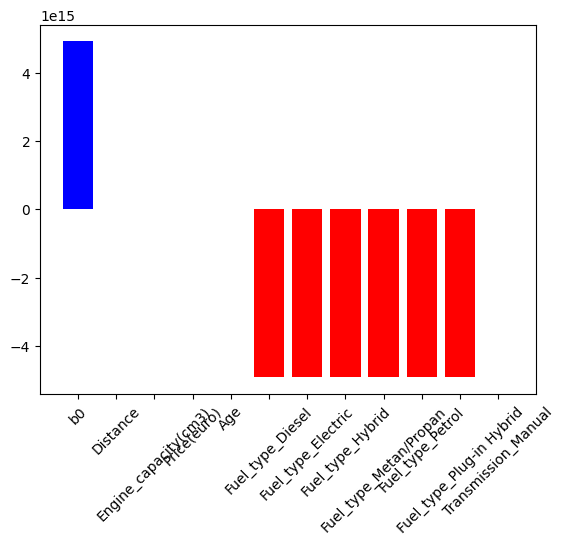

In [24]:
features_names = df_num.columns
weights_vis(B, B0, features_names)

## Применение Метрик

In [25]:
LR.fit(X_train, y_train)
y_predict = LR.predict(X_test)

print('Ошибка на тестовых данных')
print('MSE: %.1f' % mse(y_test, y_predict))
print('RMSE: %.1f' % mse(y_test, y_predict, squared=False))
print('R2 : %.4f' % r2_score(y_test, y_predict))
print('Абсолютный размах значений: %.1f' % (y.max() - y.min()))

Ошибка на тестовых данных
MSE: 10748288.2
RMSE: 3278.5
R2 : 0.8235
Абсолютный размах значений: 49499.0


Вывод: добавление категориалтьных признаков позволило повысить точность модели. Однако влияние числовых признаков ('Year', 'Distance', 'Engine_capacity(cm3)') оказалось пренебрежимо мало.
